In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.display import HTML

In [2]:

import numpy as np
import os
import data_utils
import pickle
import attacks
import random
from keras.models import load_model

Using TensorFlow backend.


In [3]:
TOKENIZER_PATH = 'tokenizer.pickle'
TEXT_DATA_DIR = '20_newsgroup/'
MODEL_PATH = '20news_model.h5'

In [4]:
tokenizer, inverse_tokenizer = data_utils.load_tokenizer(TOKENIZER_PATH)
model = load_model(MODEL_PATH)
labels =  list(sorted(os.listdir(TEXT_DATA_DIR)))

In [5]:
sample_file, true_label = data_utils.pick_random_file(TEXT_DATA_DIR)
file_text = data_utils.load_textfile(sample_file)
file_features = data_utils.process_text(tokenizer, file_text)

In [6]:
pred_scores = model.predict(file_features)
orig_prediction = np.argmax(pred_scores[0])
print('TrueLabel = %s' %true_label)
print('Predicted "%s" with %f .' %(labels[orig_prediction], pred_scores[0][orig_prediction]))

TrueLabel = rec.autos
Predicted "rec.autos" with 0.197945 .


## Randomised Attack (Non-targeted)

 Random attack will pick and replace words randomly.

In [7]:
num_words = len(tokenizer.word_index)
random_attack = attacks.RandomAttack(model, num_words)


In [8]:
x_orig = file_features.copy()
x_adv, prob_history, adv_pred = random_attack.attack(x_orig)

Attack succeeded after 46 iterations.
Original class: rec.autos, Attack class: rec.motorcycles
Number of changed words = 25 (60.98 %)


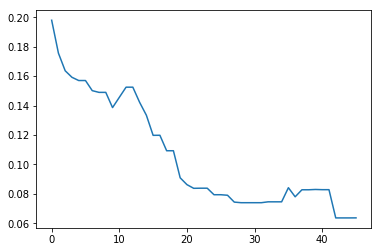

In [9]:
if x_adv is None:
    print('Attack failed. !')
else:
    print('Attack succeeded after %d iterations.' %(len(prob_history)))
    print('Original class: %s, Attack class: %s' %(labels[orig_prediction], labels[adv_pred]))
    print("Number of changed words = %d (%0.2f %%)"
          %(np.count_nonzero(x_adv != x_orig),
            100*(np.count_nonzero(x_adv != x_orig))/np.count_nonzero(x_orig)))
    plt.plot(prob_history)

## Reconstruct Text Document

In [10]:
orig_text = data_utils.reconstruct_text(inverse_tokenizer, file_features[0])
adv_text = data_utils.reconstruct_text(inverse_tokenizer, x_adv[0])

## Visualize Attack

In [11]:
orig_html, adv_html = data_utils.render_attack(orig_text, adv_text)

In [12]:
HTML("<b> Original Text </b>")
HTML(orig_html)

In [13]:
HTML("<b> Adversarial Text </b>")
HTML(adv_html)